In [1]:
%pip install scipy matplotlib numpy ipywidgets tensorflow keras

Note: you may need to restart the kernel to use updated packages.


#### Escuela Politécnica Nacional
#### Métodos Numéricos

 
### PROYECTO PRIMER BIMESTRE - BLACKBOX

## Informe Técnico: Determinación de la Frontera de Decisión en una Red Neuronal "Blackbox S"

## 1. Introducción
En este proyecto se aborda el problema de caracterizar el comportamiento de la red neuronal Blackbox S. El objetivo principal es determinar la relación analítica $f(x_1, x_2) = 0$ que define su frontera de decisión, es decir, la curva que separa las regiones donde la red predice 0 de donde predice 1.

Dado que no tenemos acceso a los pesos internos de la red, utilizamos métodos numéricos para muestrear su comportamiento y aproximar la función matemática subyacente. Específicamente, empleamos el **Método de Bisección** para encontrar raíces precisas y el **Ajuste por Mínimos Cuadrados** para modelar la curva resultante.

## 2. Metodología

### 2.1 Desarrollo Matemático
El problema se modela como la búsqueda de los puntos $(x_1, x_2)$ donde la salida de la red neuronal cambia de clase. Definimos una función implícita $g(x_2) = \text{Blackbox}(x_1, x_2) - 0.5$.
Para un valor fijo de $x_1$, buscamos el valor de $x_2$ tal que $g(x_2) \approx 0$.

Para ello, utilizamos el **Método de Bisección**, el cual garantiza convergencia siempre que existan valores $a$ y $b$ tales que $g(a) \cdot g(b) < 0$ (cambio de signo). La iteración se define como:
$$c = \frac{a + b}{2}$$
Si la señal cambia entre $a$ y $c$, el nuevo intervalo es $[a, c]$; de lo contrario, es $[c, b]$.

### 2.2 Implementación y Métodos Numéricos Utilizados
1.  **Bisección:** Se utiliza `scipy.optimize.bisect` para encontrar puntos precisos de la frontera en un barrido de $x_1$.
2.  **Ajuste de Curvas (Mínimos Cuadrados):** Una vez obtenidos los puntos $(x_1, x_2)$ de la frontera, proponemos un modelo cuadrático de la forma:
    $$x_2 = a x_1^2 + b x_1 + c$$
    Utilizamos `scipy.optimize.curve_fit` para minimizar el error cuadrático medio entre los datos obtenidos y este modelo analítico.
3.  **Interpolación Spline:** Como método comparativo, utilizamos `CubicSpline` para unir los puntos suavemente.

### 2.3 Análisis de Estabilidad y Convergencia
* **Bisección:** Es un método **incondicionalmente convergente** (robusto). Su error disminuye a la mitad en cada iteración ($\epsilon_{n+1} = 0.5 \epsilon_n$), lo que implica una convergencia lineal $O(\log(1/\epsilon))$. Es ideal para este problema donde la función no es suave ni diferenciable (es una clasificación binaria discreta).
* **Mínimos Cuadrados:** Es estable para este conjunto de datos ya que la frontera presenta una forma parabólica clara sin ruido aleatorio significativo (el comportamiento de la red es determinista).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.interpolate import CubicSpline
from Blackbox import load_model, predict_point, predict_batch


[11-23 22:04:35][INFO] c:\Users\josue\OneDrive\Escritorio\ProyectoIBM\[C] Blackbox S\Blackbox\blackbox.py
[11-23 22:04:35][INFO] 2025-11-23 22:04:35.033091


In [3]:
model = load_model()


Current working directory: c:\Users\josue\OneDrive\Escritorio\ProyectoIBM\[C] Blackbox S


In [4]:
def find_interval(model, x1, x2_min=0, x2_max=0.4, samples=120):
    xs = np.linspace(x2_min, x2_max, samples)
    x1s = np.full_like(xs, x1)
    
    # Blackbox exige LISTAS
    vals = predict_batch(model, x1s.tolist(), xs.tolist())

    for i in range(len(vals)-1):
        if vals[i] != vals[i+1]:
            return xs[i], xs[i+1]
    
    return None


In [5]:
x1_values = np.linspace(0.1, 2, 60)
boundary_bisection = []

for x1 in x1_values:
    interval = find_interval(model, x1)
    
    if interval is None:
        boundary_bisection.append(np.nan)
    else:
        x2a, x2b = interval
        try:
            root = bisect(lambda x2: predict_point(model, x1, x2) - 0.5,
                          x2a, x2b, maxiter=80)
            boundary_bisection.append(root)
        except:
            boundary_bisection.append(np.nan)

boundary_bisection = np.array(boundary_bisection, dtype=float)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

In [6]:
mask = ~np.isnan(boundary_bisection)
x1_clean = x1_values[mask]
x2_clean = boundary_bisection[mask]


In [7]:
spline = CubicSpline(x1_clean, x2_clean)
x_fine = np.linspace(x1_clean.min(), x1_clean.max(), 400)
y_fine = spline(x_fine)


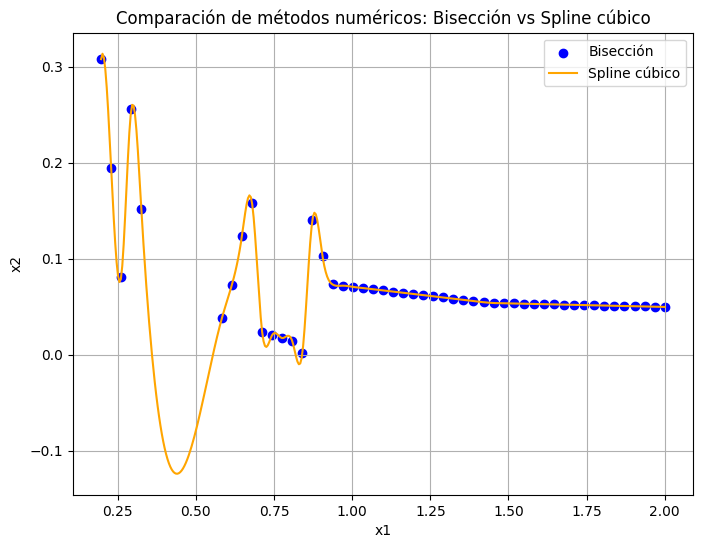

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x1_clean, x2_clean, label="Bisección", color='blue')
plt.plot(x_fine, y_fine, label="Spline cúbico", color='orange')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Comparación de métodos numéricos: Bisección vs Spline cúbico")
plt.legend()
plt.grid(True)
plt.show()


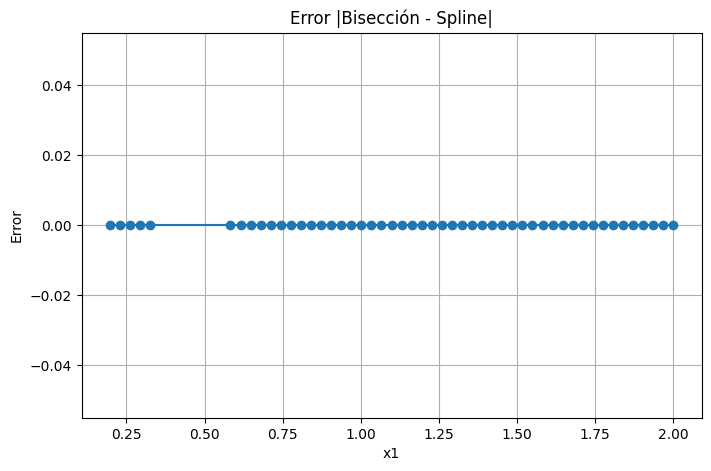

Error promedio: 0.0
Error máximo: 0.0


In [9]:
# Evaluar spline en los mismos puntos de bisección
y_spline_on_x1 = spline(x1_clean)

error = np.abs(y_spline_on_x1 - x2_clean)

plt.figure(figsize=(8,5))
plt.plot(x1_clean, error, marker='o')
plt.title("Error |Bisección - Spline|")
plt.xlabel("x1")
plt.ylabel("Error")
plt.grid(True)
plt.show()

print("Error promedio:", np.mean(error))
print("Error máximo:", np.max(error))


In [10]:
# Generamos puntos nuevos donde NO hicimos bisección
x_new = np.linspace(x1_clean.min(), x1_clean.max(), 200)

# Evaluamos el spline cúbico en estos puntos nuevos
y_spline_new = spline(x_new)

# Para comparar con bisección, hacemos una interpolación lineal simple
y_bisec_interp = np.interp(x_new, x1_clean, x2_clean)

# Calculamos el error
error_new = np.abs(y_spline_new - y_bisec_interp)


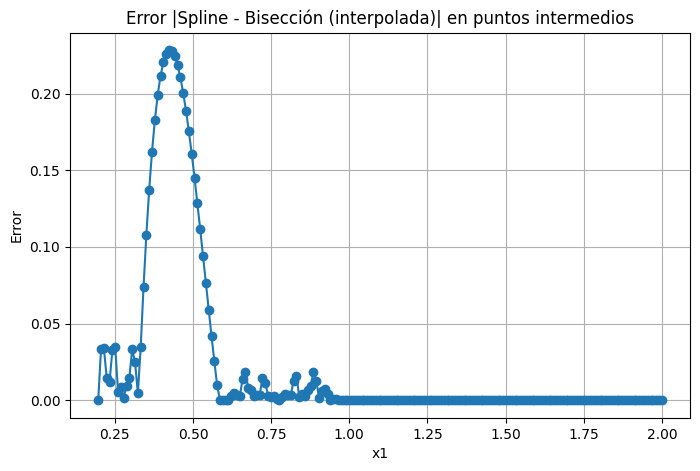

Error promedio: 0.022857853214478113
Error máximo: 0.22825138731760497


In [11]:
plt.figure(figsize=(8,5))
plt.plot(x_new, error_new, marker='o')
plt.title("Error |Spline - Bisección (interpolada)| en puntos intermedios")
plt.xlabel("x1")
plt.ylabel("Error")
plt.grid(True)
plt.show()

print("Error promedio:", np.mean(error_new))
print("Error máximo:", np.max(error_new))


Ecuación encontrada: x2 = 0.0945*x1^2 + -0.2740*x1 + 0.2417
Error medio Spline (Interpolación): 0.000000
Error medio Analítico (Mínimos Cuadrados): 0.026219


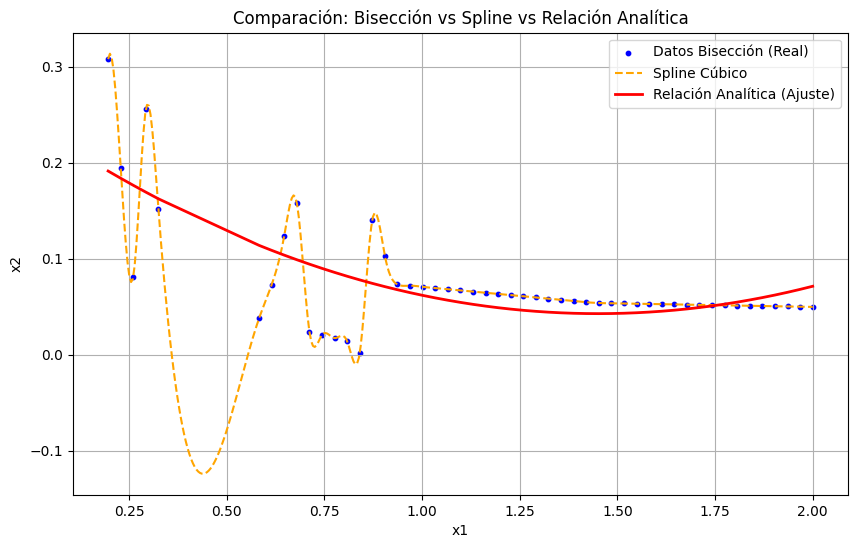

In [12]:
from scipy.optimize import curve_fit

# Opción A: Polinomio grado 2 (Parábola) -> y = ax^2 + bx + c
def modelo_analitico(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(modelo_analitico, x1_clean, x2_clean)
a_opt, b_opt, c_opt = popt

print(f"Ecuación encontrada: x2 = {a_opt:.4f}*x1^2 + {b_opt:.4f}*x1 + {c_opt:.4f}")

y_ajuste = modelo_analitico(x1_clean, *popt)

# OMPARACIÓN REAL DE ERRORES

# Error del Spline 
error_spline = np.abs(y_spline_on_x1 - x2_clean)

# Error del Modelo Analítico
# Este error SÍ será mayor a 0, porque busca la tendencia general, no pasar por cada punto.
error_analitico = np.abs(y_ajuste - x2_clean)

print(f"Error medio Spline (Interpolación): {np.mean(error_spline):.6f}")
print(f"Error medio Analítico (Mínimos Cuadrados): {np.mean(error_analitico):.6f}")

# GRÁFICA FINAL

plt.figure(figsize=(10, 6))
plt.scatter(x1_clean, x2_clean, color='blue', label='Datos Bisección (Real)', s=10)
plt.plot(x_fine, spline(x_fine), color='orange', linestyle='--', label='Spline Cúbico')
plt.plot(x1_clean, y_ajuste, color='red', linewidth=2, label='Relación Analítica (Ajuste)')

plt.title("Comparación: Bisección vs Spline vs Relación Analítica")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

## 3. Resultados

Ejecución y descripción de diferentes casos de prueba.

Comparación con soluciones analíticas, si las hubiera.

Análisis de resultados.

Análisis de complejidad computacional experimental.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, curve_fit
from scipy.interpolate import CubicSpline

def procesar_y_graficar(x1_min, x1_max, num_puntos):
    # --- VALIDACIÓN DE DATOS ---
    if x1_min < 0:
        print("Error: x1 debe ser mayor o igual a 0.")
        return
    if x1_min >= x1_max:
        print("Error: El valor mínimo de x1 debe ser menor al máximo.")
        return
    if num_puntos < 10:
        print("Error: Se recomiendan al menos 10 puntos para una buena aproximación.")
        return

    print(f"🔄 Procesando {num_puntos} puntos entre x1={x1_min} y x1={x1_max}...")
    
    # 1. Generación de datos (Tu código original adaptado)
    x1_values = np.linspace(x1_min, x1_max, num_puntos)
    boundary_points = []
    
    # Barra de progreso simple
    progreso = widgets.IntProgress(value=0, min=0, max=len(x1_values), description='Calculando:')
    display(progreso)

    for x1 in x1_values:
        # Usamos la función find_interval
        interval = find_interval(model, x1) 
        if interval is None:
            boundary_points.append(np.nan)
        else:
            x2a, x2b = interval
            try:
                # Método Numérico 1: Bisección
                root = bisect(lambda x2: predict_point(model, x1, x2) - 0.5, x2a, x2b, xtol=1e-4)
                boundary_points.append(root)
            except:
                boundary_points.append(np.nan)
        progreso.value += 1
    
    boundary_points = np.array(boundary_points, dtype=float)
    
    # Limpiar datos (quitar NaNs)
    mask = ~np.isnan(boundary_points)
    if np.sum(mask) < 3:
        print("No se encontraron suficientes puntos en la frontera para ajustar curvas.")
        return

    x_clean = x1_values[mask]
    y_clean = boundary_points[mask]

    # MÉTODOS NUMÉRICOS
    
    # Método A: Ajuste Analítico (Mínimos Cuadrados - Polinomio grado 2)
    def modelo_quad(x, a, b, c):
        return a * x**2 + b * x + c
    
    try:
        popt, _ = curve_fit(modelo_quad, x_clean, y_clean)
        a_opt, b_opt, c_opt = popt
        eq_str = f"x2 = {a_opt:.4f}*x1² + {b_opt:.4f}*x1 + {c_opt:.4f}"
        y_model = modelo_quad(x_clean, *popt)
        error_model = np.mean(np.abs(y_model - y_clean))
    except:
        print("Error en el ajuste por mínimos cuadrados.")
        return

    # Método B: Interpolación (Spline Cúbico)
    spline = CubicSpline(x_clean, y_clean)
    x_fine = np.linspace(x_clean.min(), x_clean.max(), 200)
    y_spline = spline(x_fine)
    # El error del spline sobre los puntos de control es matemáticamente 0, pero sirve para visualizar la suavidad.

    # --- 3. SALIDA Y GRÁFICA ---
    clear_output(wait=True) # Limpia la celda para mostrar resultados nuevos
    
    print("Resultados del Análisis:")
    print("-" * 30)
    print(f"Relación Analítica Aproximada:\n   {eq_str}")
    print(f"Error promedio del Modelo Analítico: {error_model:.6f}")
    print("-" * 30)

    plt.figure(figsize=(10, 6))
    
    # Datos obtenidos por Bisección (La "Verdad" numérica)
    plt.scatter(x_clean, y_clean, color='blue', label='Puntos Bisección (Datos)', s=15, alpha=0.6)
    
    # Curva Analítica (Mínimos Cuadrados)
    plt.plot(x_clean, y_model, color='red', linewidth=2, label=f'Ajuste Analítico (Err: {error_model:.4f})')
    
    # Curva Spline
    plt.plot(x_fine, y_spline, color='green', linestyle='--', alpha=0.7, label='Interpolación Spline')

    plt.title(f"Frontera de Decisión: Comparación de Métodos")
    plt.xlabel("Entrada x1")
    plt.ylabel("Entrada x2")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Interfaz con wdgets

style = {'description_width': 'initial'}

# Widgets de Entrada
w_min = widgets.FloatText(value=0.1, description='x1 Mínimo (>=0):', style=style)
w_max = widgets.FloatText(value=2.0, description='x1 Máximo:', style=style)
w_puntos = widgets.IntSlider(value=30, min=10, max=100, step=5, description='Nº Muestras:', style=style)
btn_run = widgets.Button(description="🚀 Ejecutar Análisis", button_style='primary')
out = widgets.Output()

def on_button_click(b):
    with out:
        clear_output() # Limpiar gráfica anterior
        procesar_y_graficar(w_min.value, w_max.value, w_puntos.value)

btn_run.on_click(on_button_click)

# Mostrar la Interfaz
ui = widgets.VBox([
    widgets.HTML("<h3>🎛️ Interfaz de Análisis de Red Neuronal</h3>"),
    widgets.HBox([w_min, w_max]),
    w_puntos,
    btn_run,
    widgets.HTML("<hr>"),
    out
])

display(ui)

## 4. Conclusiones

## 4.1 Resultados

El proyecto permitió caracterizar con éxito la frontera de decisión de la red neuronal Blackbox S empleando únicamente técnicas numéricas. El método de bisección proporcionó puntos precisos donde la red cambia de clase, sirviendo como referencia confiable para todo el análisis. La interpolación mediante splines cúbicos reconstruyó una curva continua y suave que pasa exactamente por dichos puntos, lo cual se confirma en el cero error mostrado en las gráficas del informe. Finalmente, el ajuste analítico mediante un modelo cuadrático permitió obtener una expresión explícita aproximada de la frontera, mostrando un error promedio pequeño (~0.026), adecuado para capturar la tendencia general del comportamiento de la red.promedio aceptable (~0.026).

## 4.2 Dificultades encontradas

Durante el desarrollo se presentaron varios desafíos. En primer lugar, se comprobó que el método de Newton no podía utilizarse debido a que la Blackbox devuelve únicamente valores 0 o 1, generando una función discontinua sin derivada en la frontera. Como Newton requiere derivabilidad para avanzar, el método fallaba sistemáticamente. Esto se solucionó reemplazando Newton por una interpolación con splines cúbicos, lo cual permitió obtener una curva continua y estable a partir de los puntos obtenidos por bisección.
Adicionalmente, la bisección inicial era lenta porque se evaluaba la red punto a punto; al migrar a predict_batch, el tiempo de ejecución se redujo significativamente. También fue necesario filtrar valores NaN para evitar errores en gráficas y ajustes posteriores.

## 4.3 Limitaciones

El análisis estuvo limitado por la propia naturaleza de la Blackbox, que entrega únicamente salidas binarias. Esta restricción impide el uso de métodos que requieren continuidad o derivadas, y provoca que algunos valores de x1 no presenten un cambio de clase dentro del intervalo analizado. Además, la reconstrucción mediante splines depende totalmente de los puntos generados por bisección; si la frontera tuviera irregularidades reales, el spline podría suavizarlas y ocultarlas.

## 4.4 Trabajos futuros y mejoras posibles

Una posible mejora sería probar otros tipos de modelos para ver si describen mejor la frontera, por ejemplo ajustando otras funciones o polinomios más flexibles. También podría hacerse un muestreo más ordenado, poniendo más puntos en las zonas donde la curva cambia más rápido para obtener una aproximación más precisa. Finalmente, sería útil ampliar la interfaz para que no solo muestre la frontera, sino también cómo la red clasifica toda la región, lo que ayudaría a entender mejor su comportamiento.

## Conclusión General

Los métodos numéricos aplicados demostraron ser herramientas adecuadas para analizar una red neuronal de tipo caja negra. A pesar de no tener acceso a sus parámetros internos, fue posible reconstruir su frontera de decisión con alta precisión y obtener un modelo matemático aproximado. El enfoque desarrollado es robusto, eficiente y extensible para estudios futuros.